## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [2]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
# Combine the data into a single dataset
# Display the data table for preview
mouse_merged = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "outer")
mouse_merged.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
mouse_merged.duplicated().sum()

1

In [6]:
#checking the number of mice in the clean DataFrame
count_mouse = len(mouse_merged['Mouse ID'].unique())
count_mouse

249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_rows = mouse_merged[mouse_merged.duplicated(['Mouse ID','Timepoint'])]
duplicate_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
## Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = mouse_merged[mouse_merged['Mouse ID'] !='g989']
clean_mouse_data = clean_data.copy()

clean_data.duplicated().sum()

0

In [9]:
#checking the number of mice in the clean DataFrame
count_mouse = len(clean_data['Mouse ID'].unique())
count_mouse

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
regimen_grouped = clean_data.groupby(['Drug Regimen'])
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
regimen_mean = regimen_grouped['Tumor Volume (mm3)'].mean()
regimen_median = regimen_grouped['Tumor Volume (mm3)'].median()
regimen_var = regimen_grouped['Tumor Volume (mm3)'].var()
stan_regimen = regimen_grouped['Tumor Volume (mm3)'].std()
sem_regimen = regimen_grouped['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({"Mean": regimen_mean, "Median": regimen_median,
                                 "Variance": regimen_var, "Standard Deviation": stan_regimen ,
                                 "SEM": sem_regimen})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
clean_data.groupby('Drug Regimen').agg( Mean = ('Tumor Volume (mm3)', np.mean),
                                       Median = ('Tumor Volume (mm3)', np.median),
                                      Variance = ('Tumor Volume (mm3)', np.var ),
                                       Standard_Deviation = ('Tumor Volume (mm3)', np.std),
                                      SEM = ('Tumor Volume (mm3)', 'sem'))

,Mean,Median,Variance,Standard_Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Measurements')

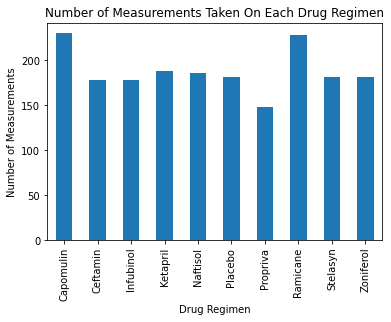

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_groups = clean_mouse_data.groupby('Drug Regimen')
#find out how many drug regimens have been measured
drug_count = drug_groups['Mouse ID'].count()
#Chart the data, give it a title, and label axis
drug_chart = drug_count.plot.bar(title = "Number of Measurements Taken On Each Drug Regimen")
drug_chart.set_xlabel('Drug Regimen')
drug_chart.set_ylabel("Number of Measurements")


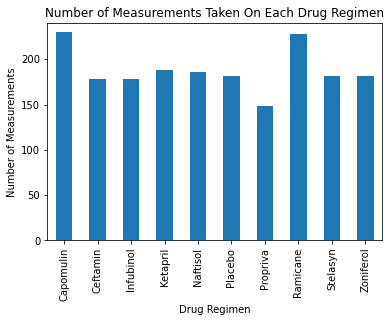

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_groups = clean_mouse_data.groupby('Drug Regimen')
mouse_df = drug_groups['Mouse ID'].count().reset_index()
x_axis = mouse_df['Drug Regimen'].tolist()
y_axis = mouse_df['Mouse ID'].tolist()
plt.xticks(rotation = 'vertical')
plt.bar(x_axis,y_axis, align = 'center', width = .5)

plt.xlim(-0.5,len(x_axis)-.5)
plt.ylim(0, 240)
plt.ylabel('Number of Measurements')
plt.xlabel('Drug Regimen')
plt.title("Number of Measurements Taken On Each Drug Regimen")
plt.show()


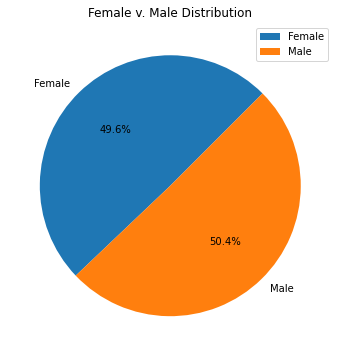

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Grouped by mouse id and sex
gender_groups  = clean_mouse_data.groupby(['Mouse ID', 'Sex'])
# Counted the number of males/females made a dataframe
mouse_count = gender_groups.count()
mouse_count_indexed = mouse_count.reset_index()
# dropped unecessary columns
x = mouse_count_indexed.drop(['Drug Regimen', 'Age_months', 'Weight (g)', 'Timepoint', 
                              'Tumor Volume (mm3)', 'Metastatic Sites'], axis = 1)
x_grouped = x.groupby(['Sex'])
x_organized = x_grouped.count().reset_index()
x_organized_renamed = x_organized.rename(columns = {'Mouse ID': ''})
x_organized_renamed.groupby(['Sex']).sum().plot(kind = 'pie', subplots = None, startangle = 45,
                                               autopct = '%1.1f%%', figsize = (12,6), title = 'Female v. Male Distribution')


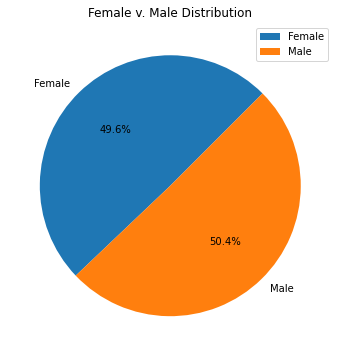

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_groups  = clean_mouse_data.groupby(['Mouse ID', 'Sex'])

mouse_count = gender_groups.count()
mouse_count_indexed = mouse_count.reset_index()
x = mouse_count_indexed.drop(['Drug Regimen', 'Age_months', 'Weight (g)', 'Timepoint', 
                              'Tumor Volume (mm3)', 'Metastatic Sites'], axis = 1)
x_grouped = x.groupby(['Sex'])
x_organized = x_grouped.count().reset_index()
# Created a list 
gender = x_organized['Sex'].tolist()
count_mouse = x_organized['Mouse ID'].tolist()
# created a pie chart - sized the pie chart, added labels, %, 45 degree angle for aesthetics, added a legend, and title
fig, ax1 = plt.subplots(figsize = (12,6))
ax1.pie(count_mouse, labels = gender, autopct = "%1.1f%%", startangle = 45)
plt.title('Female v. Male Distribution')
ax1.legend(labels = gender, loc = 'upper right')
plt.show()

## Quartiles, Outliers and Boxplots

In [66]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
#clean_mouse_data.groupby(['Mouse ID'], sort = False)['Timepoint'].max()
idx = clean_mouse_data.groupby(['Mouse ID'])['Timepoint'].transform(max)==clean_mouse_data['Timepoint']

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
top_regimen = clean_mouse_data[idx]#.set_index("Drug Regimen")

#dropping drug regimens that don't equal to "Capomulin, Ramicane, Infubinol, and Ceftamin"
x1 = top_regimen[top_regimen['Drug Regimen'] != 'Stelasyn']
x2 = x1[x1['Drug Regimen'] != 'Propriva']
x3= x2[x2['Drug Regimen'] != 'Naftisol']
x4 = x3[x3['Drug Regimen'] != 'Ketapril']
x5 = x4[x4['Drug Regimen'] != 'Zoniferol']
x6 = x5[x5['Drug Regimen'] != 'Placebo']
#resetting index
final_tumorVol_drugs = x6.reset_index()
#dropping 'index' column
final_tumorVol_drugs.drop('index', inplace = True, axis = 1)
final_tumorVol_drugs

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3


In [59]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regiment = final_tumorVol_drugs['Drug Regimen'].tolist()

# Create empty list to fill with tumor vol data (for plotting)
# already filled list
#tumor_vol_data = final_tumorVol_drugs['Tumor Volume (mm3)'].tolist()

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes # add subset 
    # Everything on cell 18 shows work on 
tumor_vol_data = final_tumorVol_drugs['Tumor Volume (mm3)'].tolist()   
    
    # Determine outliers using upper and lower bounds
tumor_vol_data.sort()
print(tumor_vol_data)

[22.05012627, 23.34359787, 28.43096411, 28.48403281, 29.12847181, 30.27623175, 30.48598484, 30.56462509, 30.63869575, 31.02392294, 31.09533505, 31.56046955, 31.896238399999998, 32.37735684, 32.97852192, 33.32909778, 33.39765251, 33.56240217, 34.45529799, 36.04104736, 36.13485243, 36.321345799999996, 36.37451039, 36.56165229, 37.07402422, 37.22565033, 37.31123552, 37.31184577, 38.125164399999996, 38.34200823, 38.407618299999996, 38.75326548, 38.81036633, 38.84687569, 38.93963263, 38.98287774, 39.95234669, 40.1592203, 40.65812366, 40.65900627, 40.66771292, 40.72857787, 41.48300765, 41.58152074, 43.04754260000001, 43.16637266, 43.41938077, 44.18345092, 45.0, 45.0, 45.0, 45.0, 45.22086888, 45.69933088, 46.25011212, 46.53920617, 46.78453491, 47.01036401, 47.68596303, 47.784681799999994, 48.72207785, 50.00513807, 51.54243058, 52.92534846, 54.04860769, 54.65654872, 55.62942846, 55.65068132, 55.74282869, 56.05774909, 57.03186187, 57.91838132, 58.26844248, 59.74190064, 59.85195552, 60.16518046,

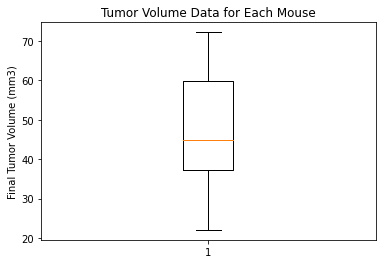

In [60]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume Data for Each Mouse')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_data)
plt.show()

## Line and Scatter Plots

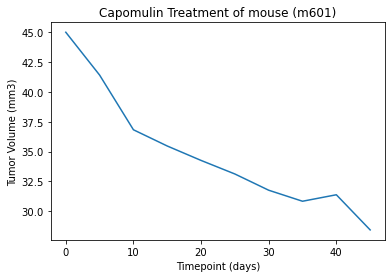

In [76]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap = clean_mouse_data.loc[clean_mouse_data['Drug Regimen'] == 'Capomulin']
mouse_data = cap.loc[cap['Mouse ID'] == 'm601']
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint (days)')
plt.title("Capomulin Treatment of mouse (m601)")
plt.show()



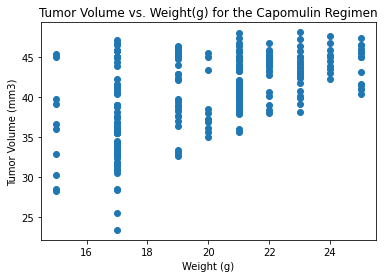

In [85]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap = clean_mouse_data.loc[clean_mouse_data['Drug Regimen'] == 'Capomulin']
plt.scatter(cap['Weight (g)'],cap['Tumor Volume (mm3)'])
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.title("Tumor Volume vs. Weight(g) for the Capomulin Regimen")
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
